In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\Enittproj\\Enitt'

In [104]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [105]:
## 파일불러오기 ( 추가데이터 포함되어 있는 것은 제외 )
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "서울"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 2]
ent_data_weather


,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [106]:
## DELETE COLUMN AND EDIT COLUMN

## '지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,-3.2,0.0,0.5,110.0,40.0,0.0,0.0,0.0,0.0,0.3
2018-01-01 01:00,-3.3,0.0,0.7,360.0,41.0,0.0,0.0,0.0,0.0,0.3
2018-01-01 02:00,-3.7,0.0,0.9,270.0,42.0,0.0,0.0,0.0,0.0,0.3
2018-01-01 03:00,-4.0,0.0,1.0,290.0,44.0,0.0,0.0,0.0,0.0,0.3
2018-01-01 04:00,-4.2,0.0,1.1,290.0,53.0,0.0,0.0,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,15.2,0.0,3.4,200.0,62.0,0.0,0.0,0.0,7.0,14.7
2020-10-31 20:00,15.1,0.0,2.8,200.0,59.0,0.0,0.0,0.0,8.0,14.5
2020-10-31 21:00,14.9,0.0,2.7,200.0,58.0,0.0,0.0,0.0,10.0,14.4


In [107]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

ent_data_weather["env_levelsolar"].describe()
ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()
    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 9~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","18" "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupbyasdf
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ## 최대값과 최솟값이 같을 경우 = 발전량 0 or 그 시간대 총발전량이 1개밖에 없어 비교 불가능한 경우
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())


def groupby_solar_reset():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_dcv", "pow_dca"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    ent_data_need["watt"] = ent_data_need["pow_dcv"] * ent_data_need["pow_dca"]

    ## RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
    ent_data_perhour = ent_data_need.groupby(["pow_date", "dummy_time"]).mean()
    ent_data_perhour = ent_data_perhour.reset_index()


    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort

### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b[["pow_dcv", "pow_dca", "watt" ]])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar_reset()
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)


,env_date,dummy_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt
2018-10-22 12:00,2018-10-22,12,333.375000,321.937500,25.050000,17.881250,440.000000,5.634615,2478.961538
2018-10-22 13:00,2018-10-22,13,490.514286,563.442857,28.157143,18.405714,437.610169,6.477966,2835.030508
2018-10-22 14:00,2018-10-22,14,368.214286,426.042857,26.777143,19.221429,442.080645,4.809677,2121.775806
2018-10-22 15:00,2018-10-22,15,242.214286,294.400000,21.861429,18.455714,452.500000,2.990323,1346.912903
2018-10-22 16:00,2018-10-22,16,116.159420,132.362319,18.288406,17.346377,441.347826,1.184058,532.931884
...,...,...,...,...,...,...,...,...,...
2020-10-22 13:00,2020-10-22,13,591.000000,775.615385,25.476923,16.830769,509.538462,0.000000,0.000000
2020-10-22 14:00,2020-10-22,14,491.916667,695.333333,23.758333,17.483333,509.833333,0.000000,0.000000
2020-10-22 15:00,2020-10-22,15,385.500000,638.750000,21.791667,17.800000,509.250000,0.000000,0.000000
2020-10-22 16:00,2020-10-22,16,154.000000,280.461538,16.684615,15.915385,491.307692,0.000000,0.000000


In [108]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('banpo2_join.csv', encoding='utf-8')



1.3070738048146076
-0.5386492544819054


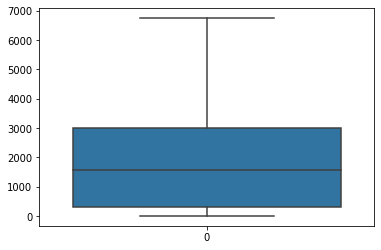

In [109]:
## 이상치 제거

# sns.boxplot(data = join_ent_other_set["watt"])


import pandas as pd
from scipy import stats

# deleteoutlier = stats.zscore(join_ent_other_set["watt"])
# deleteoutlier
deleteoutlier = stats.zscore(join_ent_other_set["watt"])
join_ent_other_set["z_score"] = deleteoutlier

join_ent_other_del = join_ent_other_set.loc[join_ent_other_set['z_score'].abs()<=3]
join_ent_other_del.describe()
sns.boxplot(data = join_ent_other_del["watt"])
# df.loc[df['z_score'].abs()<=3]
print(join_ent_other_del['z_score'].max())
print(join_ent_other_del['z_score'].min())
## 다시 저장
join_ent_other_del.to_csv('banpo2_join.csv', encoding='utf-8')

In [110]:
join_ent_other_del.describe()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
count,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.00000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000
mean,314.668320,391.933850,16.008503,10.355605,455.215923,3.907863,1796.022915,11.107707,0.099887,2.292898,210.294673,48.86037,0.669890,1.123672,0.046052,4.830374,10.569475,312.131134,-0.046624
std,227.096033,296.573395,12.449881,10.276907,33.557561,3.458347,1542.376165,10.337998,0.843886,1.110444,112.218355,18.67570,0.421444,0.713020,0.414758,3.970738,9.490993,198.061131,0.422538
min,0.000000,0.000000,-12.568571,-14.415714,339.400000,0.000000,0.000000,-13.900000,0.000000,0.000000,0.000000,13.00000,0.000000,0.000000,0.000000,0.000000,-3.100000,0.000000,-0.538649
25%,111.064286,113.992857,6.320124,2.184526,429.762074,0.702133,309.096781,2.900000,0.000000,1.400000,90.000000,35.00000,0.200000,0.490000,0.000000,0.000000,1.800000,136.111111,-0.453971
50%,303.028571,349.985507,13.691667,8.623188,454.571429,3.281429,1551.639130,9.500000,0.000000,2.200000,270.000000,46.00000,1.000000,1.060000,0.000000,6.000000,8.100000,294.444444,-0.113573
75%,493.209341,650.389337,25.000000,18.322340,483.079545,6.316629,3006.004774,19.400000,0.000000,3.000000,290.000000,59.00000,1.000000,1.690000,0.000000,9.000000,17.900000,469.444444,0.284854
max,987.333333,1028.100000,53.960000,37.808571,533.323077,16.072857,6737.377143,36.500000,20.400000,9.100000,360.000000,98.00000,1.000000,3.250000,8.800000,10.000000,33.200000,902.777778,1.307074


In [111]:
join_ent_other_del.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
env_slopesolar,1.000000,0.935344,0.618021,0.291428,0.308681,0.872526,0.878482,0.248490,-0.128915,-0.007432,0.049393,-0.270780,0.537733,0.861718,-0.058802,-0.393178,0.221027,0.861718,0.878482
env_levelsolar,0.935344,1.000000,0.446148,0.122096,0.412082,0.760425,0.787200,0.085719,-0.132664,0.048029,0.113732,-0.425431,0.618176,0.854349,-0.064048,-0.528846,0.041699,0.854349,0.787200
env_modtemp,0.618021,0.446148,1.000000,0.921283,-0.297823,0.599999,0.547726,0.898562,-0.001590,-0.109126,-0.085151,0.092940,0.171912,0.612538,-0.137573,0.057085,0.846172,0.612538,0.547726
env_airtemp,0.291428,0.122096,0.921283,1.000000,-0.511674,0.319643,0.252200,0.994964,0.049879,-0.058334,-0.069785,0.212256,-0.019381,0.358578,-0.124130,0.226487,0.952683,0.358578,0.252200
pow_dcv,0.308681,0.412082,-0.297823,-0.511674,1.000000,0.122220,0.199715,-0.543536,-0.126225,0.018361,0.055611,-0.261693,0.290028,0.183830,-0.028146,-0.366167,-0.523005,0.183830,0.199715
pow_dca,0.872526,0.760425,0.599999,0.319643,0.122220,1.000000,0.994503,0.280896,-0.103874,-0.055299,0.034949,-0.191442,0.434194,0.715843,-0.101500,-0.277392,0.262620,0.715843,0.994503
watt,0.878482,0.787200,0.547726,0.252200,0.199715,0.994503,1.000000,0.212851,-0.108707,-0.047379,0.046639,-0.220432,0.456742,0.714865,-0.103789,-0.317847,0.196870,0.714865,1.000000
기온,0.248490,0.085719,0.898562,0.994964,-0.543536,0.280896,0.212851,1.000000,0.061821,-0.029533,-0.050540,0.210710,-0.033367,0.341943,-0.125249,0.242105,0.952896,0.341943,0.212851
강수량,-0.128915,-0.132664,-0.001590,0.049879,-0.126225,-0.103874,-0.108707,0.061821,1.000000,-0.027365,-0.029528,0.286087,-0.186205,-0.158034,0.006569,0.152560,0.099558,-0.158034,-0.108707
풍속,-0.007432,0.048029,-0.109126,-0.058334,0.018361,-0.055299,-0.047379,-0.029533,-0.027365,1.000000,0.321331,-0.102455,0.083763,0.094980,0.065831,-0.065655,0.023123,0.094980,-0.047379


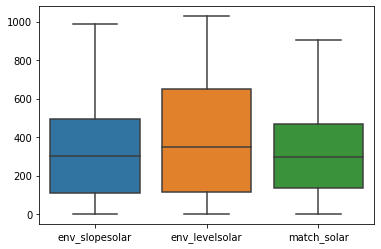

In [112]:
sns.boxplot(data = join_ent_other_del[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [113]:
import scipy.stats

print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["match_solar"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["match_solar"]))
print("------------------")
print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["match_solar"], join_ent_other_del["watt"]))

(0.8543492568356907, 0.0) (0.8617177239471023, 0.0)
------------------
(0.787200286893599, 0.0) (0.8784816013780432, 0.0) (0.7148648963664022, 0.0)


In [114]:
import statsmodels.api as sm

Y = join_ent_other_del["watt"]
X = join_ent_other_del["env_slopesolar"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
# results.summary()

X2 = join_ent_other_del["match_solar"]
model2 = sm.OLS(Y,X2)
results1 = model2.fit()


print(results.summary())
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                   watt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     8942.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:24:33   Log-Likelihood:                -21232.
No. Observations:                2647   AIC:                         4.247e+04
Df Residuals:                    2645   BIC:                         4.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -81.4187     24.483     -3.

In [115]:

def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # return b

bb = join_ent_other_del[join_ent_other_del["env_slopesolar"] != 0 ]
bb = bb[bb["env_levelsolar"] != 0 ]
bb = bb[bb["match_solar"] != 0 ]
bb = bb[bb["일사"] != 0 ]

x = mean_absolute_percentage_error(bb["env_levelsolar"], bb["match_solar"])
x

641.2485283700878

In [116]:
# join_ent_other_del["env_levelsolar"]
# join_ent_other_del["match_solar"]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = join_ent_other_del["env_levelsolar"].to_numpy()
X_t = X.reshape(-1, 1)
Y = join_ent_other_del["match_solar"].to_numpy()
Y_t = Y.reshape(-1, 1)

X_0 = bb["env_levelsolar"].to_numpy()
X_t_0 = X_0.reshape(-1, 1)
Y_0 = bb["match_solar"].to_numpy()
Y_t_0 = Y_0.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.25, shuffle=True, random_state = 42)
X_0_train, X_0_test, Y_0_train, Y_0_test = train_test_split(X_t_0, Y_t_0, test_size = 0.25, shuffle=True, random_state = 42)


array([[321.9375    ],
       [563.44285714],
       [426.04285714],
       ...,
       [638.75      ],
       [280.46153846],
       [ 15.75      ]])

In [123]:
## X : 기업 일사량, Y : 공공 일사량
# join_ent_other_del["env_levelsolar"]
# join_ent_other_del["match_solar"]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_0 = bb["env_levelsolar"].to_numpy()
X_t_0 = X_0.reshape(-1, 1)
Y_0 = bb["match_solar"].to_numpy()
Y_t_0 = Y_0.reshape(-1, 1)

X_0_train, X_0_test, Y_0_train, Y_0_test = train_test_split(X_t_0, Y_t_0, test_size = 0.25, shuffle=True, random_state = 42)

X_t_0


# print(predY_out)
## Y, predY_out 을 비교하면 공공일사량과, 기업일사량으로 표시한 공공일사량 확인 가능

## 먼저 mse


## 다음 mape y_true : 공공일사량, y_pred : 기업일사량으로 표시한 공공일사량 
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## 이것 또한 inf 가 나온다 0 값때문인 거 같다. 
## => 0 값을 제거한 값을 넣어 보자 ;

my_model_del0 = LinearRegression()
my_model_del0.fit(X_0_train, Y_0_train)
predY0_in = my_model.predict(X_0_train)
predY0_out = my_model.predict(X_0_test)

print("mse", metrics.mean_absolute_error(Y_0_test, predY0_out))
print("mape", mean_absolute_percentage_error(Y_0_test, predY0_out))

mse 77.85413757562196
mape 48.66206964132413


In [124]:
bb = bb[bb["watt"] != 0 ]
## 이대로 공공일사량을 쓰지 못하는가 ,, 
## 공공일사량으로 예측한 watt와 기업일사량으로 예측한 watt를 비교해보자

Y = bb["watt"].to_numpy()
Y = Y.reshape(-1, 1)
X1 = bb["env_levelsolar"].to_numpy()
X1 = X1.reshape(-1, 1)
X2 = bb["match_solar"].to_numpy()
X2 = X2.reshape(-1, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, random_state=42, test_size=0.25)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, random_state=42, test_size=0.25)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
pred1 = model1.predict(X1_test)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)
print("score 1 ", model1.score(X1, Y))
print("score 2 ",model2.score(X2, Y))

print("1, env_levelsolar : mse", metrics.mean_absolute_error(y1_test, pred1))
print("1, env_levelsolar : mape", mean_absolute_percentage_error(y1_test, pred1))

print("2, match_solar : mse", metrics.mean_absolute_error(y2_test, pred2))
print("2, match_solar : mape", mean_absolute_percentage_error(y2_test, pred2))


score 1  0.6891960440236833
score 2  0.6098662930703882
1, env_levelsolar : mse 589.6568391598446
1, env_levelsolar : mape 140.87296871218982
2, match_solar : mse 745.8046724914265
2, match_solar : mape 267.68163641567634


In [128]:
## 언제 match_solar와 env_levelsolar 가 차이가 많이 나는지를 봐보자 
diff = ((join_ent_other_del["env_levelsolar"] - join_ent_other_del["match_solar"])) / join_ent_other_del["env_levelsolar"]
diff2 = (join_ent_other_del["env_levelsolar"] - join_ent_other_del["env_slopesolar"])
diff3 = diff + diff2 

join_ent_other_del["diff"] = diff
join_ent_other_del["diff2"] = diff2
join_ent_other_del["diff3"] = diff3

df_diff = join_ent_other_del[["env_levelsolar","env_slopesolar", "match_solar", "diff", "diff2", "diff3"]]
df_diff.describe()


df_diff[df_diff["diff"] == df_diff["diff"].max()]

df_diff[df_diff["match_solar"] == 0]
df_diff.loc[df_diff["diff"] == df_diff["diff"].min(), :]
df_diff.iloc[500:].head(50)


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_diff.index, y=df_diff["diff"], mode='lines', name="발전량", line=dict(color='blue')), secondary_y = False)
# fig.add_trace(go.Scatter(x=df_weather_resample_D.index, y=df_weather_resample_D[x], mode='lines', name=x, line=dict(color='red')), secondary_y = True)
fig.update_layout(width=1000, height=300,)
fig.show()

df_diff.describe()["diff"]
2019-10-28  29   17:00

count    2647.000000
mean            -inf
std              NaN
min             -inf
25%        -0.439572
50%         0.176864
75%         0.385044
max         1.000000
Name: diff, dtype: float64